In [2]:
from itertools import product

import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

from fairpair import *

## Chance of Winning

In [87]:
scores = np.arange(0.01,1.01,0.01)
scores_ij = np.array(list(product(scores, scores)))
probs = pd.DataFrame(scores_ij, columns=['i\'s score', 'j\'s score'])
probs

,i's score,j's score
0,0.01,0.01
1,0.01,0.02
2,0.01,0.03
3,0.01,0.04
4,0.01,0.05
...,...,...
9995,1.00,0.96
9996,1.00,0.97
9997,1.00,0.98
9998,1.00,0.99


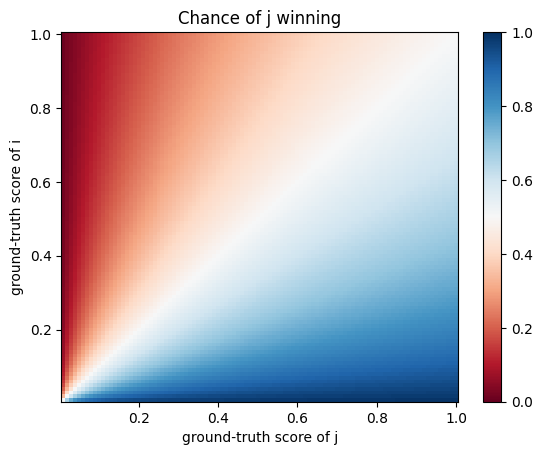

In [88]:
BTL_probs = probs.copy()
BTL_probs['prob j winning'] = BTL_probs['j\'s score'] / (BTL_probs['i\'s score'] + BTL_probs['j\'s score'])

fig, ax = plt.subplots()
c = ax.pcolormesh(scores, scores, np.array(BTL_probs['prob j winning']).reshape(100, 100), cmap='RdBu', vmin=0, vmax=1)
ax.set_title('Chance of j winning')
ax.set_xlabel('ground-truth score of j')
ax.set_ylabel('ground-truth score of i')
fig.colorbar(c, ax=ax)
plt.show()

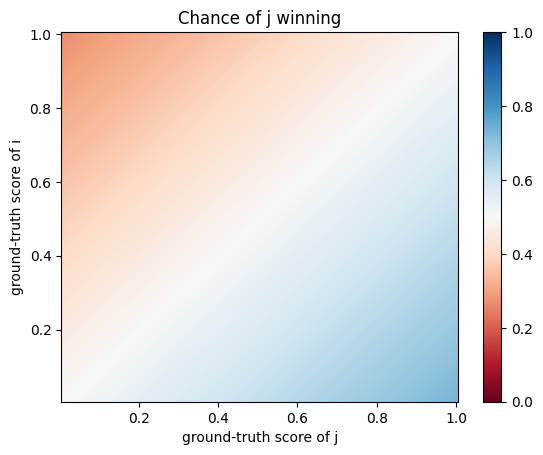

In [89]:
BTL_probs = probs.copy()
BTL_probs['prob j winning'] = np.exp(BTL_probs['j\'s score']) / (np.exp(BTL_probs['i\'s score']) + np.exp(BTL_probs['j\'s score']))
#min_prob = min(BTL_probs['prob j winning'])
#max_prob = max(BTL_probs['prob j winning'])
#BTL_probs['prob j winning'] = (BTL_probs['prob j winning'] - min_prob)/(max_prob - min_prob)

fig, ax = plt.subplots()
c = ax.pcolormesh(scores, scores, np.array(BTL_probs['prob j winning']).reshape(100, 100), cmap='RdBu', vmin=0, vmax=1)
ax.set_title('Chance of j winning')
ax.set_xlabel('ground-truth score of j')
ax.set_ylabel('ground-truth score of i')
fig.colorbar(c, ax=ax)
plt.show()

## Range of Scores

In [111]:
scores = np.arange(0,10,0.01)
scores_ij = np.array(list(product(scores, scores)))
probs = pd.DataFrame(scores_ij, columns=['i\'s score', 'j\'s score'])

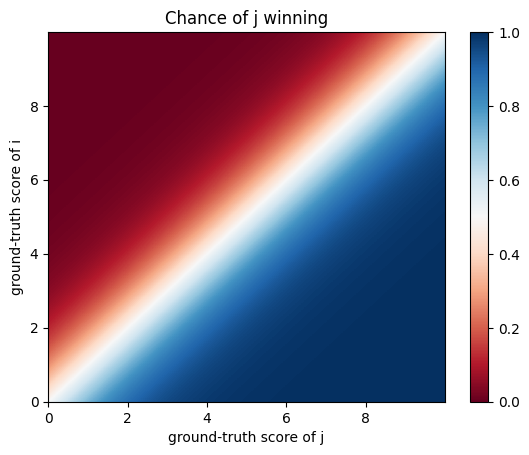

In [112]:
BTL_probs = probs.copy()
BTL_probs['prob j winning'] = np.exp(BTL_probs['j\'s score']) / (np.exp(BTL_probs['i\'s score']) + np.exp(BTL_probs['j\'s score']))
#min_prob = min(BTL_probs['prob j winning'])
#max_prob = max(BTL_probs['prob j winning'])
#BTL_probs['prob j winning'] = (BTL_probs['prob j winning'] - min_prob)/(max_prob - min_prob)

fig, ax = plt.subplots()
c = ax.pcolormesh(scores, scores, np.array(BTL_probs['prob j winning']).reshape(1000, 1000), cmap='RdBu', vmin=0, vmax=1)
ax.set_title('Chance of j winning')
ax.set_xlabel('ground-truth score of j')
ax.set_ylabel('ground-truth score of i')
fig.colorbar(c, ax=ax)
plt.show()